In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

**Method**: “lmg” / “Shapley Value Regression” / “Dominance Analysis”

**Motivation**:  estimating the relative importance of predictors in the presence of multicollinearity. Not interested in predicting* the outcome variable, but instead estimating the relative effect of the components on the outcome

- believed to provide the most stable and unbiased estimates.
- computing linear regressions using all possible combinations of predictors/ components and looking at the proportion of variance explained by each of these multiple models. For each predictor the algorithm computes the weighted average incremental improvement in the proportion of explained variance that is created when adding that variable to the model in different combinations. These average values are then re-based to add up to 100%.

Loyalty is the average of three brand loyalty questions: two on advocacy, one on retention and one on enrichment. 

**Loyalty** = *f(* **Trust, Feeling, Function, Simplicity** *)*

**UX_Loyalty** = *f(* **qxoverallxqualityxindicators_N** *) for N in range(1,5)*

**Quality Indicators.* The quality indicators consist of four metrics designed to measure the quality of a user experience. For the purposes of this study, the four metrics are feeling, trust, simplicity and function.

**UX (User Experience) Index.** The UX Index is a calculated value on a 1-100 scale that represents the quality of a consumer’s UX based on four quality indicators. To calculate the UX Index, a survey respondent’s assigned smartphone performance for the four quality indicators are multiplied by a weighting derived from quantifying how the quality indicators drive loyalty.

In [3]:
root = r"07 Samsung UX Index - Web App Implementation/"

fname_data = root + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)

fname_vaxmap = root + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# How does UX_Index correlate with UX_Loyalty?
## Poorly for saavy seekers & settled survivors, Apple, Motorola

In [4]:
df_data[["UXindex","UX_Loyalty"]].corr()

,UXindex,UX_Loyalty
UXindex,1.000000,0.629523
UX_Loyalty,0.629523,1.000000


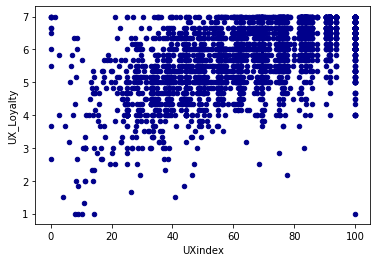

In [6]:
df_data[["UXindex","UX_Loyalty"]].plot.scatter(x='UXindex',y='UX_Loyalty',c='DarkBlue')

1

In [35]:
def corrfunction (df, var, label):
    df_corr_br = df_data.groupby(var)[["UXindex","UX_Loyalty"]].corr().reset_index()
    df_corr_br = df_corr_br[df_corr_br['level_1']=='UX_Loyalty']
    df_corr_br = df_corr_br.merge(df_valmap[df_valmap.key==var],  
                             left_on=var, right_on="id", how='left')
    df_corr_br = df_corr_br[['Label', 'UXindex']]
    df_corr_br.columns = [label, 'corr']
    
    cmap = plt.cm.Spectral
    norm = plt.Normalize(vmin=min(df_data[var]), vmax=max(df_data[var]))
    fig, ax = plt.subplots()
    print(df_data[["UXindex","UX_Loyalty"]].plot.scatter(x='UXindex',y='UX_Loyalty',
                                                         c=cmap(norm(np.array(df_data[var]))),
                                                         legend=True, ax=ax))
    return(df_corr_br)

AxesSubplot(0.125,0.125;0.775x0.755)


,brand,corr
0,Samsung,0.634700
1,Apple,0.557082
2,LG,0.700933
3,Google,0.679851
4,Motorola,0.534264


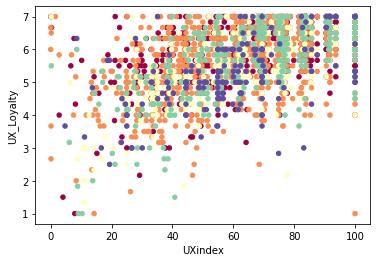

In [36]:
corrfunction( df_data, 'hbrand', 'brand')

AxesSubplot(0.125,0.125;0.775x0.755)


,generational cohort,corr
0,Gen Z,0.575716
1,Younger millennials,0.651602
2,Older millennials,0.630961


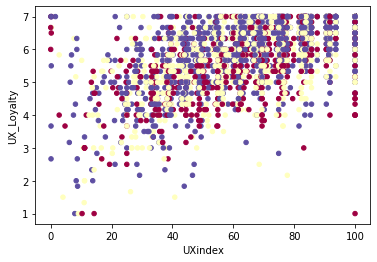

In [37]:
corrfunction( df_data, 'hidagemodels', 'generational cohort')

AxesSubplot(0.125,0.125;0.775x0.755)


,gender,corr
0,Male,0.621709
1,Female,0.629525
2,Non-binary,0.731261
3,Would rather not say,0.846604


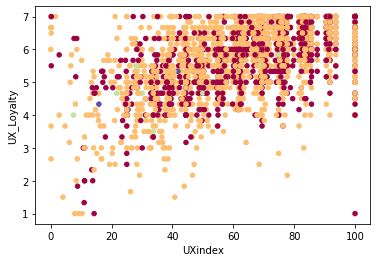

In [38]:
corrfunction( df_data, 'd1', 'gender')

AxesSubplot(0.125,0.125;0.775x0.755)


,Empowered_Customer_Groups,corr
0,Progressive Pioneers,0.635689
1,Savvy Seekers,0.506155
2,Convenience Conformers,0.622281
3,Settled Survivors,0.546823
4,Reserved Resisters,0.640582


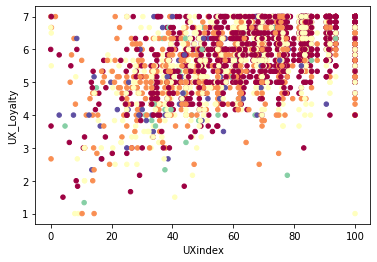

In [39]:
corrfunction( df_data, 'Empowered_Customer_Groups', 'Empowered_Customer_Groups')

In [41]:
df_data['qxdriversxoe']

0                                                      nA
1                                             Dont recall
2                       It's purple, so I really love it.
3                                  Cant think of anything
4       having a good form of communcation to  keep wi...
                              ...                        
3249                                                  N/a
3250                                    yes its very good
3251    Smartphone helps me be successful personally a...
3252                                     Processing power
3253                                             sfsvdsdc
Name: qxdriversxoe, Length: 3254, dtype: object